In [1]:
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2


In [2]:
class CheckpointEvaluation:

    def __init__(self,
                 checkpoint_epoch: int,
                 eval_score_normal: float,
                 eval_score_bonus: float = None):
        self.checkpoint_epoch = checkpoint_epoch
        # self.eval_score_normal = eval_score_normal
        # self.eval_score_bonus = eval_score_bonus
        self.eval_score_normal = eval_score_normal if eval_score_normal is not None else np.nan
        self.eval_score_bonus = eval_score_bonus if eval_score_bonus is not None else np.nan


# results = {
#     "Double LR, 100 Epochs": [CheckpointEvaluation(200, 12.5, 5.0), CheckpointEvaluation(150, 15.7, 4.0), CheckpointEvaluation(170, 18.0, 4.75)],
#     r"Weight Decay $= 10^{-4}$": [CheckpointEvaluation(170, 21.0, 7.8), CheckpointEvaluation(180, 22.5, 6.0), CheckpointEvaluation(150, 21.0, 7.0)],
#     "Initial Run": [CheckpointEvaluation(200, 19.8612, 3.9596)]
# }

results = {
    "Double LR, 100 Epochs": [
        CheckpointEvaluation(100, 17.7319, 7.531),
        CheckpointEvaluation(100, None, None),
        CheckpointEvaluation(100, None, None)
    ],
    r"Weight Decay $= 10^{-4}$": [
        CheckpointEvaluation(200, 17.3164, 2.7552),
        CheckpointEvaluation(200, None, None),
        CheckpointEvaluation(200, None, None)
    ],
    "Initial Run": [CheckpointEvaluation(200, 19.8612, 3.9596)]
}

In [3]:
# Get "statistics" on the results.
means_normal_cred = dict()
means_extra_cred = dict()
for name, res in results.items():
    means_normal_cred[name] = np.nanmean([e.eval_score_normal for e in res])

    bonus_scores = [e.eval_score_bonus for e in res]
    if any([score is None for score in bonus_scores]):
        means_extra_cred[name] = None
    else:
        means_extra_cred[name] = np.nanmean(bonus_scores)

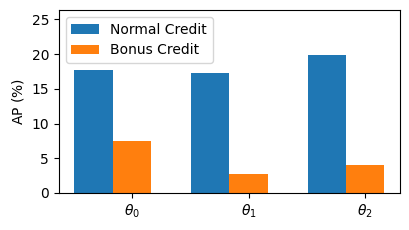

In [8]:
USE_TIGHT_LAYOUT = True
USE_BAR_LABELS = False

# IEEE single column size is 3.5 inches.
# figsize = [3.5, 5.0]
# figsize = [7.0, 8.0]
figscale = 1.2
figsize = np.array([3.5, 2.0]) * figscale

kwargs = {"figsize": figsize}
if not USE_TIGHT_LAYOUT:
    kwargs["layout"] = "constrained"

fig, ax = plt.subplots(**kwargs)

x = np.arange(len(results))  # the label locations
width = 0.33  # the width of the bars
multiplier = 0

offset = width * multiplier
rects = ax.bar(x + offset,
               means_normal_cred.values(),
               width,
               label="Normal Credit")
if USE_BAR_LABELS:
    ax.bar_label(rects, padding=3)
multiplier += 1

offset = width * multiplier
rects = ax.bar(x + offset,
               means_extra_cred.values(),
               width,
               label="Bonus Credit")
if USE_BAR_LABELS:
    ax.bar_label(rects, padding=3)
multiplier += 1

ax.set_ylabel('AP ($\%$)')
# ax.set_title("Figure title")
xtick_names = [f"$\\theta_{i}$" for i in range(len(results.keys()))]
ax.set_xticks(x + width, xtick_names)
ax.legend()

# Give some extra room for the legend.
max_y_val = max(max(means_normal_cred.values()),
                max(means_extra_cred.values()))
ax.set_ylim(0.0, max_y_val + 6.5)

if USE_TIGHT_LAYOUT:
    fig.tight_layout()


In [9]:
fig.savefig("hyperparameter_tuning_results.png", dpi=300)